<a href="https://colab.research.google.com/github/Limithra2006/AI-inventory-forecasting/blob/main/Copy_of_ai_inventory_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
suvroo_inventory_optimization_for_retail_path = kagglehub.dataset_download('suvroo/inventory-optimization-for-retail')
atharvasoundankar_fashion_retail_sales_path = kagglehub.dataset_download('atharvasoundankar/fashion-retail-sales')
hassanali699_e_commerce_tech_dataset_path = kagglehub.dataset_download('hassanali699/e-commerce-tech-dataset')
kekavigi_earthquakes_in_indonesia_path = kagglehub.dataset_download('kekavigi/earthquakes-in-indonesia')

print('Data source import complete.')


Data source import complete.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/fashion-retail-sales")

print("Path to dataset files:", path)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassanali699/e-commerce-tech-dataset")

print("Path to dataset files:", path)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("suvroo/inventory-optimization-for-retail")

print("Path to dataset files:", path)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kekavigi/earthquakes-in-indonesia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashion-retail-sales
Path to dataset files: /kaggle/input/e-commerce-tech-dataset
Path to dataset files: /kaggle/input/inventory-optimization-for-retail
Path to dataset files: /kaggle/input/earthquakes-in-indonesia


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.read_csv("/kaggle/input/fashion-retail-sales/Fashion_Retail_Sales.csv")


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash


In [ ]:
pd.read_csv("/kaggle/input/inventory-optimization-for-retail/pricing_optimization.csv")

,Product ID,Store ID,Price,Competitor Prices,Discounts,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost,Elasticity Index
0,9502,13,31.61,56.14,19.68,255,3,13.33,6.72,1.78
1,2068,77,35.51,63.04,16.88,5,3,1.50,8.38,1.67
2,7103,59,6.54,30.61,10.86,184,3,9.44,3.86,2.46
3,5288,19,13.61,15.94,45.28,337,1,15.11,8.80,0.88
4,7212,66,62.68,30.64,33.48,80,3,19.62,9.74,1.00
...,...,...,...,...,...,...,...,...,...,...
9995,4408,48,94.99,21.83,39.72,367,4,5.97,6.14,1.25
9996,1634,64,58.99,12.98,37.95,184,1,1.47,8.21,1.08
9997,9766,74,6.93,31.08,1.37,402,3,8.18,7.25,2.27
9998,1130,23,39.27,37.18,31.85,493,2,4.79,5.44,0.68


In [ ]:
pd.read_csv("/kaggle/input/e-commerce-tech-dataset/Dataset(Shophive HomeShopping PriceOye).csv")

,product_name,product_price,product_image,product_link,product_store,product_category,product_ratings,rating_count,description,date
0,Mibro A2 Bluetooth Calling Smart Watch,"Rs. 8,299",https://images.priceoye.pk/mibro-a2-bluetooth-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,8 Ratings,"{'Display': '1.39 inches', 'Screen Type': 'HD ...",2023-12-03
1,Mibro Watch Lite2,"Rs. 12,999",https://images.priceoye.pk/mibro-watch-lite2-p...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,79 Ratings,"{'Display': '1.3 Inches', 'Screen Type': 'Amol...",2023-12-03
2,Mibro GS Pro Calling Smart Watch,"Rs. 15,999",https://images.priceoye.pk/mibro-gs-pro-callin...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,5 Ratings,"{'Display': '1.43', 'Screen Type': 'AMOLED', '...",2023-12-03
3,Mibro T1 Smart Watch,"Rs. 13,999",https://images.priceoye.pk/mibro-t1-pakistan-p...,https://priceoye.pk/smart-watches/mibro/mibro-t1,PriceOye,"Smart-Watches, Mibro",5.0,79 Ratings,"{'Display': '1.6 Inch', 'Screen Type': 'AMOLED...",2023-12-03
4,Mibro Smart Watch T2,"Rs. 13,999",https://images.priceoye.pk/mibro-smart-watch-t...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Ratings,"{'Display': '1.75 Inches', 'Screen Type': 'AMO...",2023-12-03
...,...,...,...,...,...,...,...,...,...,...
4273,Oppo A77s (4G 8GB 128GB Starry Black) With Off...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/d/8...,https://homeshopping.pk/products/Oppo-A77s-8GB...,HomeShopping,"MobilePhones, Oppo",NaN,NaN,"['', 'Oppo A77s\xa0Price & Specs', 'HIGHLIGHT'...",2023-12-03
4274,OPPO A16k (4G 4GB 64GB Blue) With Official War...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/t/8...,https://homeshopping.pk/products/OPPO-A16k-Blu...,HomeShopping,"MobilePhones, Oppo",NaN,NaN,"['', 'OPPO A16k Price & Specs', 'OPPO A16k Pri...",2023-12-03
4275,Nokia 105 simba (2022) wireless FM radio dual sim,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/i/9...,https://homeshopping.pk/products/Nokia-105-sim...,HomeShopping,"MobilePhones, Nokia",NaN,NaN,"['', 'Nokia 105 simba (2022) wireless FM radio...",2023-12-03
4276,Nokia 5710 (4G Dual Sim 2.4 inch Black) With O...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/u/7...,https://homeshopping.pk/products/Nokia-5710-Bl...,HomeShopping,"MobilePhones, Nokia",NaN,NaN,"['', 'Xiaomi Redmi Note 12\xa0Price & Specs', ...",2023-12-03


In [ ]:
pd.read_csv("/kaggle//e-commeinputrce-tech-dataset/Ecommerce Dataset v2.csv")

,product_name,product_price,product_image,product_link,product_store,product_category,product_ratings,rating_count,description,date
0,Mibro C3 Bluetooth Calling Smart Watch,"Rs 6,599",https://images.priceoye.pk/mibro-c3-bluetooth-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",4.8,4 Reviews,"{'Display': '46mm', 'Screen Type': 'Full-Touch...",2025-04-08
1,Mibro Smart Watch T2,"Rs 10,799",https://images.priceoye.pk/mibro-smart-watch-t...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,6 Reviews,"{'Display': '44mm', 'Screen Type': 'AMOLED', '...",2025-04-08
2,Mibro Watch Lite 3 With Dual Strap,"Rs 11,499",https://images.priceoye.pk/mibro-watch-lite-3-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Review,"{'Display': '33mm', 'Screen Type': 'AMOLED', '...",2025-04-08
3,Mibro Watch C4,"Rs 6,999",https://images.priceoye.pk/mibro-watch-c4-paki...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Review,"{'Display': '51mm', 'Screen Type': 'Large Disp...",2025-04-08
4,Mibro Watch Lite 3 Pro,"Rs 14,299",https://images.priceoye.pk/mibro-watch-lite3-p...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",4.2,6 Reviews,"{'Display': '1.32″', 'Screen Type': 'AMOLED', ...",2025-04-08
...,...,...,...,...,...,...,...,...,...,...
4196,Google Pixel 9 Pro XL (5G 16GB 256GB Porcelain...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/w/5...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9 Pro XL\xa0 Price & Specs'...",2025-04-08
4197,Google Pixel 9 Pro XL (5G 16GB 128GB Obsidian)...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/o/1...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9 Pro XL\xa0 Price & Specs'...",2025-04-08
4198,Google Pixel 9 (5G 12GB 128GB Porcelain) - Non...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/f/1...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9\xa0 Price & Specs', 'The ...",2025-04-08
4199,Google Pixel 8 Pro (5G 12GB 256GB Porcelain) -...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/r/2...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 8 Pro\xa0Price & Specs', 'G...",2025-04-08


In [ ]:
pd.read_csv("/kaggle/input/earthquakes-in-indonesia/katalog_gempa.csv")

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
suvroo_inventory_optimization_for_retail_path = kagglehub.dataset_download('suvroo/inventory-optimization-for-retail')
atharvasoundankar_fashion_retail_sales_path = kagglehub.dataset_download('atharvasoundankar/fashion-retail-sales')
hassanali699_e_commerce_tech_dataset_path = kagglehub.dataset_download('hassanali699/e-commerce-tech-dataset')
kekavigi_earthquakes_in_indonesia_path = kagglehub.dataset_download('kekavigi/earthquakes-in-indonesia')

print('Data source import complete.')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# prompt: load the above dataset

# The paths provided in the preceding code are incorrect for a standard Colab environment.
# Assuming the downloaded datasets are available in the current working directory or a subdirectory,
# we will load the datasets using their filenames.
# Please adjust the file paths if your datasets are located elsewhere.

# Load Fashion Retail Sales dataset
try:
  # This variable is defined in the first cell, make sure that cell is run.
  fashion_sales_df = pd.read_csv(f'{atharvasoundankar_fashion_retail_sales_path}/Fashion_Retail_Sales.csv')
  print("Fashion Retail Sales dataset loaded successfully.")
  print(fashion_sales_df.head())
except FileNotFoundError:
  print("Error: Fashion_Retail_Sales.csv not found. Please check the file path.")

# Load Inventory Optimization dataset
try:
  # This variable is defined in the first cell, make sure that cell is run.
  inventory_optimization_df = pd.read_csv(f'{suvroo_inventory_optimization_for_retail_path}/pricing_optimization.csv')
  print("\nInventory Optimization dataset loaded successfully.")
  print(inventory_optimization_df.head())
except FileNotFoundError:
  print("Error: pricing_optimization.csv not found. Please check the file path.")

# Load E-commerce Tech Dataset (assuming there are two files as indicated)
try:
  # This variable is defined in the first cell, make sure that cell is run.
  ecommerce_tech_df1 = pd.read_csv(f'{hassanali699_e_commerce_tech_dataset_path}/Dataset(Shophive HomeShopping PriceOye).csv')
  print("\nE-commerce Tech Dataset 1 loaded successfully.")
  print(ecommerce_tech_df1.head())
except FileNotFoundError:
  print("Error: Dataset(Shophive HomeShopping PriceOye).csv not found. Please check the file path.")

try:
  # Correcting the path based on typical Kaggle download structure
  # This variable is defined in the first cell, make sure that cell is run.
  ecommerce_tech_df2 = pd.read_csv(f'{hassanali699_e_commerce_tech_dataset_path}/Ecommerce Dataset v2.csv')
  print("\nE-commerce Tech Dataset 2 loaded successfully.")
  print(ecommerce_tech_df2.head())
except FileNotFoundError:
  print("Error: Ecommerce Dataset v2.csv not found. Please check the file path.")

# Load Earthquakes in Indonesia dataset
try:
  # This variable is defined in the first cell, make sure that cell is run.
  earthquakes_df = pd.read_csv(f'{kekavigi_earthquakes_in_indonesia_path}/katalog_gempa.csv')
  print("\nEarthquakes in Indonesia dataset loaded successfully.")
  print(earthquakes_df.head())
except FileNotFoundError:
  print("Error: katalog_gempa.csv not found. Please check the file path.")

Data source import complete.
Fashion Retail Sales dataset loaded successfully.
   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  

Inventory Optimization dataset loaded successfully.
   Product ID  Store ID  Price  Competitor Prices  Discounts  Sales Volume  \
0        9502        13  31.61              56.14      19.68           255   
1        2068        77  35

In [ ]:
# prompt: generate me the next step code

# After loading the data, the next logical step is to perform some initial data exploration
# and cleaning for each loaded DataFrame. This includes checking data types,
# looking for missing values, and getting basic statistics.

print("\n--- Data Exploration and Cleaning ---")

# Function to perform basic data exploration
def explore_dataframe(df, name):
  print(f"\nExploring: {name}")
  print("Shape:", df.shape)
  print("\nData Types:")
  print(df.dtypes)
  print("\nMissing Values:")
  print(df.isnull().sum())
  print("\nBasic Statistics:")
  print(df.describe(include='all'))

# Explore each loaded DataFrame
if 'fashion_sales_df' in locals():
  explore_dataframe(fashion_sales_df, "Fashion Retail Sales")

if 'inventory_optimization_df' in locals():
  explore_dataframe(inventory_optimization_df, "Inventory Optimization")

if 'ecommerce_tech_df1' in locals():
  explore_dataframe(ecommerce_tech_df1, "E-commerce Tech Dataset 1")

if 'ecommerce_tech_df2' in locals():
  explore_dataframe(ecommerce_tech_df2, "E-commerce Tech Dataset 2")

if 'earthquakes_df' in locals():
  explore_dataframe(earthquakes_df, "Earthquakes in Indonesia")


--- Data Exploration and Cleaning ---

Exploring: Fashion Retail Sales
Shape: (3400, 6)

Data Types:
Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

Missing Values:
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

Basic Statistics:
        Customer Reference ID Item Purchased  Purchase Amount (USD)  \
count             3400.000000           3400            2750.000000   
unique                    NaN             50                    NaN   
top                       NaN           Belt                    NaN   
freq                      NaN             90                    NaN   
mean              4039.660588            NaN             156.709818   
std                 48.122583        

In [ ]:
# prompt: data exploration and cleaning code

import numpy as np
# Example cleaning step: Handling missing values (example for fashion_sales_df)
# This is just an illustrative example. The actual cleaning steps will depend on
# the nature of missing data and the specific analysis goals for each dataset.

if 'fashion_sales_df' in locals():
  print("\nCleaning Fashion Retail Sales dataset...")
  # Example: Fill missing numerical values with the mean
  for col in fashion_sales_df.select_dtypes(include=np.number).columns:
    if fashion_sales_df[col].isnull().any():
      mean_val = fashion_sales_df[col].mean()
      fashion_sales_df[col].fillna(mean_val, inplace=True)
      print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")

  # Example: Fill missing categorical values with the mode
  for col in fashion_sales_df.select_dtypes(include='object').columns:
    if fashion_sales_df[col].isnull().any():
      mode_val = fashion_sales_df[col].mode()[0]
      fashion_sales_df[col].fillna(mode_val, inplace=True)
      print(f"Filled missing values in '{col}' with mode: '{mode_val}'")

  print("\nMissing values after cleaning (Fashion Retail Sales):")
  print(fashion_sales_df.isnull().sum())

# Add similar cleaning steps for other dataframes as needed, based on
# the output of the explore_dataframe function and your understanding of the data.
# For example:
# if 'inventory_optimization_df' in locals():
#   print("\nCleaning Inventory Optimization dataset...")
#   # ... cleaning steps for inventory_optimization_df ...

# if 'ecommerce_tech_df1' in locals():
#   print("\nCleaning E-commerce Tech Dataset 1...")
#   # ... cleaning steps for ecommerce_tech_df1 ...

# if 'ecommerce_tech_df2' in locals():
#   print("\nCleaning E-commerce Tech Dataset 2...")
#   # ... cleaning steps for ecommerce_tech_df2 ...

# if 'earthquakes_df' in locals():
#   print("\nCleaning Earthquakes in Indonesia dataset...")
#   # ... cleaning steps for earthquakes_df ...

print("\n--- Initial Data Cleaning Complete ---")

# You can now proceed with further analysis, visualization, or feature engineering
# using the cleaned dataframes.


--- Initial Data Cleaning Complete ---


In [ ]:
# prompt: next step

import pandas as pd
import matplotlib.pyplot as plt
# Now that the data has been loaded and basic exploration/cleaning performed,
# the next step depends on the specific goals of the analysis for each dataset.
# However, common next steps include:

# 1. Data Visualization: Create plots to understand the distributions,
#    relationships between variables, and identify patterns or anomalies.

# 2. Feature Engineering: Create new features from existing ones that might
#    be more informative for modeling or analysis.

# 3. Data Transformation: Apply transformations like scaling, normalization,
#    or one-hot encoding depending on the intended analysis or modeling technique.

# 4. Merging/Combining DataFrames: If the analysis requires combining information
#    from multiple datasets.

# 5. Exploratory Data Analysis (EDA) based on specific questions:
#    For example, analyze sales trends over time, identify top-selling products,
#    study the distribution of earthquake magnitudes, etc.

print("\n--- Next Steps: Data Analysis and Visualization ---")

# Example Visualization: Distribution of Price in the Inventory Optimization dataset
if 'inventory_optimization_df' in locals() and not inventory_optimization_df.empty:
  print("\nVisualizing distribution of 'Price' in Inventory Optimization dataset...")
  plt.figure(figsize=(8, 6))
  sns.histplot(inventory_optimization_df['Price'], kde=True)
  plt.title('Distribution of Price (Inventory Optimization)')
  plt.xlabel('Price')
  plt.ylabel('Frequency')
  plt.show()

# Example Visualization: Sales over Time in Fashion Retail Sales dataset
# First, ensure the date column is in datetime format if it exists
if 'fashion_sales_df' in locals() and not fashion_sales_df.empty:
  print("\nVisualizing Sales over Time in Fashion Retail Sales dataset...")
  # Assuming there is a 'Date' or similar column
  date_column = None
  for col in fashion_sales_df.columns:
    if 'date' in col.lower():
      date_column = col
      break

  if date_column:
    try:
      fashion_sales_df[date_column] = pd.to_datetime(fashion_sales_df[date_column], errors='coerce')
      # Group by date and sum sales (assuming a 'Sales' column)
      sales_over_time = fashion_sales_df.groupby(date_column).agg({'Sales': 'sum'}).reset_index() # Replace 'Sales' if column name is different

      plt.figure(figsize=(12, 6))
      sns.lineplot(data=sales_over_time, x=date_column, y='Sales') # Replace 'Sales'
      plt.title('Total Sales Over Time (Fashion Retail)')
      plt.xlabel('Date')
      plt.ylabel('Total Sales')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()
    except KeyError:
      print(f"Column for sales (e.g., 'Sales') not found in Fashion Retail Sales dataset.")
    except Exception as e:
      print(f"Could not visualize sales over time: {e}")
  else:
    print("No date column found to plot sales over time in Fashion Retail Sales dataset.")


# Example Visualization: Magnitude distribution of Earthquakes in Indonesia
if 'earthquakes_df' in locals() and not earthquakes_df.empty:
  print("\nVisualizing Magnitude distribution of Earthquakes in Indonesia dataset...")
  # Assuming there is a 'magnitudo' column
  try:
    plt.figure(figsize=(8, 6))
    sns.histplot(earthquakes_df['magnitudo'], bins=20, kde=True) # Replace 'magnitudo' if column name is different
    plt.title('Distribution of Earthquake Magnitudes (Indonesia)')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()
  except KeyError:
      print(f"Column for magnitude (e.g., 'magnitudo') not found in Earthquakes in Indonesia dataset.")
  except Exception as e:
    print(f"Could not visualize earthquake magnitudes: {e}")


# Add more visualizations and analysis steps relevant to each dataset and your goals.
# For instance, for the e-commerce datasets, you might explore:
# - Distribution of product categories
# - Price vs. Rating analysis
# - Brand performance

print("\n--- Further Analysis Steps ---")
print("Choose a dataset and an analysis goal, then implement specific code.")
print("Possible analyses:")
print("- Analyze pricing strategies (Inventory Optimization)")
print("- Identify sales trends and patterns (Fashion Retail Sales)")
print("- Compare product features and pricing (E-commerce Tech)")
print("- Study earthquake frequency and location patterns (Earthquakes in Indonesia)")




--- Next Steps: Data Analysis and Visualization ---

--- Further Analysis Steps ---
Choose a dataset and an analysis goal, then implement specific code.
Possible analyses:
- Analyze pricing strategies (Inventory Optimization)
- Identify sales trends and patterns (Fashion Retail Sales)
- Compare product features and pricing (E-commerce Tech)
- Study earthquake frequency and location patterns (Earthquakes in Indonesia)


In [ ]:
# prompt: generate me the next process of data analysis and visualiztion

import matplotlib.pyplot as plt
# Further Analysis Example: Top selling products in Fashion Retail Sales (assuming 'Product Name' and 'Sales' columns exist)
if 'fashion_sales_df' in locals() and not fashion_sales_df.empty:
  print("\nAnalyzing Top Selling Products in Fashion Retail Sales...")
  try:
    # Group by product and sum sales
    product_sales = fashion_sales_df.groupby('Product Name').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10).reset_index()

    plt.figure(figsize=(10, 7))
    sns.barplot(data=product_sales, x='Sales', y='Product Name', palette='viridis')
    plt.title('Top 10 Products by Sales (Fashion Retail)')
    plt.xlabel('Total Sales')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()
  except KeyError as e:
    print(f"Column '{e}' not found in Fashion Retail Sales dataset for Top Products analysis.")
  except Exception as e:
    print(f"Could not analyze top selling products: {e}")


# Further Analysis Example: Analyze the distribution of product categories in one of the E-commerce Tech datasets
if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\nAnalyzing Product Category Distribution in E-commerce Tech Dataset 1...")
  # Assuming a 'Category' column exists
  try:
    plt.figure(figsize=(10, 7))
    ecommerce_tech_df1['Category'].value_counts().head(15).plot(kind='barh', color=sns.color_palette('flare', 15))
    plt.title('Top 15 Product Categories (E-commerce Tech Dataset 1)')
    plt.xlabel('Number of Products')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()
  except KeyError:
    print("Column 'Category' not found in E-commerce Tech Dataset 1 for category distribution analysis.")
  except Exception as e:
    print(f"Could not analyze product category distribution: {e}")


# Further Analysis Example: Relationship between Price and Demand in the Inventory Optimization dataset (assuming 'Price' and 'Demand' columns exist)
if 'inventory_optimization_df' in locals() and not inventory_optimization_df.empty:
  print("\nAnalyzing relationship between Price and Demand in Inventory Optimization dataset...")
  try:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=inventory_optimization_df, x='Price', y='Demand', alpha=0.6)
    plt.title('Price vs. Demand (Inventory Optimization)')
    plt.xlabel('Price')
    plt.ylabel('Demand')
    plt.show()

    # Calculate correlation
    correlation = inventory_optimization_df['Price'].corr(inventory_optimization_df['Demand'])
    print(f"\nCorrelation between Price and Demand: {correlation:.2f}")

  except KeyError:
    print("Columns 'Price' or 'Demand' not found in Inventory Optimization dataset for scatter plot analysis.")
  except Exception as e:
    print(f"Could not analyze Price vs Demand: {e}")


# Further Analysis Example: Plot earthquake locations (requires latitude and longitude columns)
# Assuming 'lat' and 'lon' columns exist in the earthquakes_df
if 'earthquakes_df' in locals() and not earthquakes_df.empty:
  print("\nVisualizing Earthquake Locations in Indonesia...")
  try:
    # Simple scatter plot of locations
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=earthquakes_df, x='lon', y='lat', size='magnitudo', sizes=(20, 200), alpha=0.6, palette='viridis', legend=False)
    plt.title('Earthquake Locations by Magnitude (Indonesia)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
  except KeyError:
    print("Columns 'lat', 'lon', or 'magnitudo' not found in Earthquakes in Indonesia dataset for location plot.")
  except Exception as e:
    print(f"Could not visualize earthquake locations: {e}")

print("\n--- Data Analysis and Visualization Steps Implemented ---")
print("Continue with more specific visualizations, statistical tests, or modeling as needed for each dataset.")


--- Data Analysis and Visualization Steps Implemented ---
Continue with more specific visualizations, statistical tests, or modeling as needed for each dataset.


In [ ]:
# prompt: use SARIMAX to tarin the model

!pip install statsmodels

import statsmodels.api as sm

# --- Example: Training SARIMAX on Fashion Retail Sales Data ---
# SARIMAX is typically used for time series forecasting.
# We will use the 'fashion_sales_df' for this example, as it contains date and sales information.
# We need to ensure the data is properly formatted as a time series.

if 'fashion_sales_df' in locals() and not fashion_sales_df.empty:
  print("\n--- Training SARIMAX Model on Fashion Retail Sales Data ---")

  # 1. Prepare the time series data
  # Ensure the date column is set as the index and the data is sorted by date.
  # Assuming 'Date' and 'Sales' columns exist and 'Date' has been converted to datetime.
  try:
    # Make sure the date column is named appropriately and is the index
    date_column_name = None
    for col in fashion_sales_df.columns:
      if 'date' in col.lower():
        date_column_name = col
        break

    if date_column_name and 'Sales' in fashion_sales_df.columns:
      # Select only the date and sales columns and set date as index
      ts_data = fashion_sales_df[[date_column_name, 'Sales']].copy()
      ts_data.rename(columns={date_column_name: 'Date'}, inplace=True)
      ts_data.set_index('Date', inplace=True)
      ts_data.sort_index(inplace=True)

      # Aggregate sales by date if there are multiple entries per day
      ts_data = ts_data.resample('D').sum() # Resample to daily frequency, summing sales

      # Handle potential missing dates/values after resampling if necessary
      ts_data['Sales'].fillna(ts_data['Sales'].mean(), inplace=True) # Simple fill with mean

      # 2. Split data into training and testing sets (optional but recommended)
      train_size = int(len(ts_data) * 0.8)
      train_data, test_data = ts_data[0:train_size], ts_data[train_size:]

      print(f"Training data size: {len(train_data)}")
      print(f"Testing data size: {len(test_data)}")

      # 3. Define the SARIMAX model parameters (p, d, q)x(P, D, Q, S)
      # These parameters need to be chosen based on the time series characteristics (e.g., using ACF/PACF plots or auto_arima)
      # For demonstration, we'll use arbitrary parameters.
      # You would typically tune these parameters for the best model performance.
      order = (1, 1, 1)      # (p, d, q)
      seasonal_order = (1, 1, 1, 12) # (P, D, Q, S) - S is the seasonal period (e.g., 12 for monthly data)

      # 4. Fit the SARIMAX model
      print("Fitting SARIMAX model...")
      try:
        model = sm.tsa.statespace.SARIMAX(train_data['Sales'],
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results = model.fit(disp=False) # disp=False suppresses optimization progress output

        print("SARIMAX model fitting complete.")
        print(results.summary())

        # 5. Make predictions (optional)
        # Forecast the next steps in the test set
        forecast_steps = len(test_data)
        forecast = results.get_forecast(steps=forecast_steps)
        predicted_mean = forecast.predicted_mean
        confidence_intervals = forecast.conf_int()

        print("\nSARIMAX Forecast:")
        print(predicted_mean.head())

        # You can then evaluate the forecast against the actual test_data['Sales']

      except Exception as e:
        print(f"Error during SARIMAX model fitting or forecasting: {e}")

    else:
      print("Required columns ('Date' or similar and 'Sales') not found or not correctly formatted in Fashion Retail Sales dataset for SARIMAX.")

  except Exception as e:
    print(f"Error preparing time series data for SARIMAX: {e}")

else:
  print("\nFashion Retail Sales dataset not found or is empty. Cannot train SARIMAX model.")




--- Training SARIMAX Model on Fashion Retail Sales Data ---
Required columns ('Date' or similar and 'Sales') not found or not correctly formatted in Fashion Retail Sales dataset for SARIMAX.


In [ ]:
# prompt: generate me the correct syntax to repair the above error

import pandas as pd
pd.read_csv(f"{hassanali699_e_commerce_tech_dataset_path}/Ecommerce Dataset v2.csv")

,product_name,product_price,product_image,product_link,product_store,product_category,product_ratings,rating_count,description,date
0,Mibro C3 Bluetooth Calling Smart Watch,"Rs 6,599",https://images.priceoye.pk/mibro-c3-bluetooth-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",4.8,4 Reviews,"{'Display': '46mm', 'Screen Type': 'Full-Touch...",2025-04-08
1,Mibro Smart Watch T2,"Rs 10,799",https://images.priceoye.pk/mibro-smart-watch-t...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,6 Reviews,"{'Display': '44mm', 'Screen Type': 'AMOLED', '...",2025-04-08
2,Mibro Watch Lite 3 With Dual Strap,"Rs 11,499",https://images.priceoye.pk/mibro-watch-lite-3-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Review,"{'Display': '33mm', 'Screen Type': 'AMOLED', '...",2025-04-08
3,Mibro Watch C4,"Rs 6,999",https://images.priceoye.pk/mibro-watch-c4-paki...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Review,"{'Display': '51mm', 'Screen Type': 'Large Disp...",2025-04-08
4,Mibro Watch Lite 3 Pro,"Rs 14,299",https://images.priceoye.pk/mibro-watch-lite3-p...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",4.2,6 Reviews,"{'Display': '1.32″', 'Screen Type': 'AMOLED', ...",2025-04-08
...,...,...,...,...,...,...,...,...,...,...
4196,Google Pixel 9 Pro XL (5G 16GB 256GB Porcelain...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/w/5...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9 Pro XL\xa0 Price & Specs'...",2025-04-08
4197,Google Pixel 9 Pro XL (5G 16GB 128GB Obsidian)...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/o/1...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9 Pro XL\xa0 Price & Specs'...",2025-04-08
4198,Google Pixel 9 (5G 12GB 128GB Porcelain) - Non...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/f/1...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 9\xa0 Price & Specs', 'The ...",2025-04-08
4199,Google Pixel 8 Pro (5G 12GB 256GB Porcelain) -...,"<em class=""ProductPrice VariationProductPrice""...",https://cdn.homeshopping.pk/product_images/r/2...,https://homeshopping.pk/products/Google-Pixel-...,HomeShopping,"MobilePhones, Google",NaN,NaN,"['', 'Google Pixel 8 Pro\xa0Price & Specs', 'G...",2025-04-08


In [ ]:
# prompt: use sarimax to train the model

import matplotlib.pyplot as plt
# Ensure statsmodels is installed (it is already in the preceding code, but good practice)
!pip install statsmodels

# --- Example: Training SARIMAX on Fashion Retail Sales Data ---
# SARIMAX is typically used for time series forecasting.
# We will use the 'fashion_sales_df' for this example, as it contains date and sales information.
# We need to ensure the data is properly formatted as a time series.

import statsmodels.api as sm

if 'fashion_sales_df' in locals() and not fashion_sales_df.empty:
  print("\n--- Training SARIMAX Model on Fashion Retail Sales Data ---")

  # 1. Prepare the time series data
  # Ensure the date column is set as the index and the data is sorted by date.
  # Assuming 'Date' and 'Sales' columns exist and 'Date' has been converted to datetime.
  try:
    # Make sure the date column is named appropriately and is the index
    date_column_name = None
    for col in fashion_sales_df.columns:
      if 'date' in col.lower():
        date_column_name = col
        break

    if date_column_name and 'Sales' in fashion_sales_df.columns:
      # Select only the date and sales columns and set date as index
      ts_data = fashion_sales_df[[date_column_name, 'Sales']].copy()
      ts_data.rename(columns={date_column_name: 'Date'}, inplace=True)
      ts_data.set_index('Date', inplace=True)
      ts_data.sort_index(inplace=True)

      # Aggregate sales by date if there are multiple entries per day
      # Using 'MS' for monthly start frequency as an example, adjust based on your data frequency
      # or 'D' for daily, 'W' for weekly, etc.
      ts_data = ts_data.resample('MS').sum() # Resample to monthly frequency, summing sales

      # Handle potential missing dates/values after resampling if necessary
      # Consider more sophisticated imputation methods if needed
      ts_data['Sales'].fillna(ts_data['Sales'].mean(), inplace=True) # Simple fill with mean

      # 2. Split data into training and testing sets (optional but recommended)
      train_size = int(len(ts_data) * 0.8)
      train_data, test_data = ts_data[0:train_size], ts_data[train_size:]

      print(f"Training data size: {len(train_data)}")
      print(f"Testing data size: {len(test_data)}")
      print("\nSample of training data:")
      print(train_data.head())
      print("\nSample of testing data:")
      print(test_data.head())

      # 3. Define the SARIMAX model parameters (p, d, q)x(P, D, Q, S)
      # These parameters need to be chosen based on the time series characteristics (e.g., using ACF/PACF plots or auto_arima)
      # For demonstration, we'll use arbitrary parameters.
      # You would typically tune these parameters for the best model performance.
      # The seasonal period S should match the resampling frequency (e.g., 12 for monthly data with annual seasonality)
      order = (1, 1, 1)      # (p, d, q) non-seasonal components
      seasonal_order = (1, 1, 1, 12) # (P, D, Q, S) seasonal components (S=12 for monthly data with annual seasonality)

      # 4. Fit the SARIMAX model
      print("\nFitting SARIMAX model...")
      try:
        model = sm.tsa.statespace.SARIMAX(train_data['Sales'],
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False, # Set to True unless you know your series is not stationary
                                          enforce_invertibility=False) # Set to True unless you know your series is not invertible

        # Fit the model
        results = model.fit(disp=False) # disp=False suppresses optimization progress output

        print("SARIMAX model fitting complete.")
        print(results.summary())

        # 5. Make predictions (optional)
        # Forecast the next steps in the test set
        forecast_steps = len(test_data)
        if forecast_steps > 0:
          print(f"\nForecasting {forecast_steps} steps...")
          try:
            forecast = results.get_forecast(steps=forecast_steps)
            predicted_mean = forecast.predicted_mean
            confidence_intervals = forecast.conf_int()

            print("\nSARIMAX Forecast (first 5 steps):")
            print(predicted_mean.head())

            # You can then evaluate the forecast against the actual test_data['Sales']
            # e.g., using RMSE, MAE, etc.

            # Optional: Plot the forecast
            plt.figure(figsize=(12, 6))
            plt.plot(train_data['Sales'], label='Training Data')
            plt.plot(test_data['Sales'], label='Actual Test Data', color='orange')
            plt.plot(predicted_mean.index, predicted_mean, label='SARIMAX Forecast', color='green')
            plt.fill_between(confidence_intervals.index,
                             confidence_intervals.iloc[:, 0],
                             confidence_intervals.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')
            plt.title('SARIMAX Forecast vs Actual Sales')
            plt.xlabel('Date')
            plt.ylabel('Sales')
            plt.legend()
            plt.show()

          except Exception as e:
            print(f"Error during SARIMAX forecasting: {e}")
        else:
          print("No test data available for forecasting.")


      except Exception as e:
        print(f"Error during SARIMAX model fitting: {e}")

    else:
      print("Required columns ('Date' or similar and 'Sales') not found or not correctly formatted in Fashion Retail Sales dataset for SARIMAX.")

  except Exception as e:
    print(f"Error preparing time series data for SARIMAX: {e}")

else:
# prompt: use sarimax to train the model

import matplotlib.pyplot as plt
# Ensure statsmodels is installed (it is already in the preceding code, but good practice)
!pip install statsmodels

# --- Example: Training SARIMAX on Fashion Retail Sales Data ---
# SARIMAX is typically used for time series forecasting.
# We will use the 'fashion_sales_df' for this example, as it contains date and sales information.
# We need to ensure the data is properly formatted as a time series.

import statsmodels.api as sm

if 'fashion_sales_df' in locals() and not fashion_sales_df.empty:
  print("\n--- Training SARIMAX Model on Fashion Retail Sales Data ---")

  # 1. Prepare the time series data
  # Ensure the date column is set as the index and the data is sorted by date.
  # Assuming 'Date' and 'Sales' columns exist and 'Date' has been converted to datetime.
  try:
    # Make sure the date column is named appropriately and is the index
    date_column_name = None
    for col in fashion_sales_df.columns:
      if 'date' in col.lower():
        date_column_name = col
        break

    if date_column_name and 'Sales' in fashion_sales_df.columns:
      # Select only the date and sales columns and set date as index
      ts_data = fashion_sales_df[[date_column_name, 'Sales']].copy()
      ts_data.rename(columns={date_column_name: 'Date'}, inplace=True)
      ts_data.set_index('Date', inplace=True)
      ts_data.sort_index(inplace=True)

      # Aggregate sales by date if there are multiple entries per day
      # Using 'MS' for monthly start frequency as an example, adjust based on your data frequency
      # or 'D' for daily, 'W' for weekly, etc.
      ts_data = ts_data.resample('MS').sum() # Resample to monthly frequency, summing sales

      # Handle potential missing dates/values after resampling if necessary
      # Consider more sophisticated imputation methods if needed
      ts_data['Sales'].fillna(ts_data['Sales'].mean(), inplace=True) # Simple fill with mean

      # 2. Split data into training and testing sets (optional but recommended)
      train_size = int(len(ts_data) * 0.8)
      train_data, test_data = ts_data[0:train_size], ts_data[train_size:]

      print(f"Training data size: {len(train_data)}")
      print(f"Testing data size: {len(test_data)}")
      print("\nSample of training data:")
      print(train_data.head())
      print("\nSample of testing data:")
      print(test_data.head())

      # 3. Define the SARIMAX model parameters (p, d, q)x(P, D, Q, S)
      # These parameters need to be chosen based on the time series characteristics (e.g., using ACF/PACF plots or auto_arima)
      # For demonstration, we'll use arbitrary parameters.
      # You would typically tune these parameters for the best model performance.
      # The seasonal period S should match the resampling frequency (e.g., 12 for monthly data with annual seasonality)
      order = (1, 1, 1)      # (p, d, q) non-seasonal components
      seasonal_order = (1, 1, 1, 12) # (P, D, Q, S) seasonal components (S=12 for monthly data with annual seasonality)

      # 4. Fit the SARIMAX model
      print("\nFitting SARIMAX model...")
      try:
        model = sm.tsa.statespace.SARIMAX(train_data['Sales'],
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False, # Set to True unless you know your series is not stationary
                                          enforce_invertibility=False) # Set to True unless you know your series is not invertible

        # Fit the model
        results = model.fit(disp=False) # disp=False suppresses optimization progress output

        print("SARIMAX model fitting complete.")
        print(results.summary())

        # 5. Make predictions (optional)
        # Forecast the next steps in the test set
        forecast_steps = len(test_data)
        if forecast_steps > 0:
          print(f"\nForecasting {forecast_steps} steps...")
          try:
            forecast = results.get_forecast(steps=forecast_steps)
            predicted_mean = forecast.predicted_mean
            confidence_intervals = forecast.conf_int()

            print("\nSARIMAX Forecast (first 5 steps):")
            print(predicted_mean.head())

            # You can then evaluate the forecast against the actual test_data['Sales']
            # e.g., using RMSE, MAE, etc.

            # Optional: Plot the forecast
            plt.figure(figsize=(12, 6))
            plt.plot(train_data['Sales'], label='Training Data')
            plt.plot(test_data['Sales'], label='Actual Test Data', color='orange')
            plt.plot(predicted_mean.index, predicted_mean, label='SARIMAX Forecast', color='green')
            plt.fill_between(confidence_intervals.index,
                             confidence_intervals.iloc[:, 0],
                             confidence_intervals.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')
            plt.title('SARIMAX Forecast vs Actual Sales')
            plt.xlabel('Date')
            plt.ylabel('Sales')
            plt.legend()
            plt.show()

          except Exception as e:
            print(f"Error during SARIMAX forecasting: {e}")
        else:
          print("No test data available for forecasting.")


      except Exception as e:
        print(f"Error during SARIMAX model fitting: {e}")

    else:
      print("Required columns ('Date' or similar and 'Sales') not found or not correctly formatted in Fashion Retail Sales dataset for SARIMAX.")

  except Exception as e:
    print(f"Error preparing time series data for SARIMAX: {e}")

else:
  print("\nFashion Retail Sales dataset not found or is empty. Cannot train SARIMAX model.")


IndentationError: expected an indented block after 'else' statement on line 123 (ipython-input-18-2122704196.py, line 126)

In [ ]:
# prompt: fix the above error

print("\nFashion Retail Sales dataset not found or is empty. Cannot train SARIMAX model.")



Fashion Retail Sales dataset not found or is empty. Cannot train SARIMAX model.


In [ ]:
# prompt: train using randomforest

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# We need a dataset that is suitable for classification or regression for RandomForest.
# The Fashion Retail Sales or E-commerce datasets might be suitable, depending on the task.
# Let's assume we want to predict a categorical outcome (classification)
# using one of the datasets, for example, predicting 'Category' based on other features
# in the E-commerce Tech Dataset 1 (ecommerce_tech_df1).

# --- Example: Training RandomForestClassifier on E-commerce Tech Dataset 1 ---
# This is a hypothetical example. You need to define a specific prediction task,
# select features (X), and a target variable (y).

if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Training RandomForestClassifier on E-commerce Tech Dataset 1 ---")

  # Define the target variable (y) and features (X)
  # Let's assume we want to predict 'Category'.
  # We need to select numerical or encoded categorical features as predictors.
  # This requires some feature engineering.

  try:
    # Drop rows where the target variable is missing
    df_rf = ecommerce_tech_df1.dropna(subset=['Category']).copy()

    # Select potential features. For simplicity, let's use numerical columns and one-hot encode some categorical ones.
    # You would need to analyze your data and choose relevant features.
    numerical_features = df_rf.select_dtypes(include=np.number).columns.tolist()

    # Remove the target if it's numerical or other irrelevant columns
    if 'Category' in numerical_features:
        numerical_features.remove('Category')
    # Add other columns to drop based on your data
    irrelevant_columns = ['Product URL', 'Image URL', 'Description', 'Product ID'] # Example irrelevant columns
    numerical_features = [col for col in numerical_features if col not in irrelevant_columns]


    categorical_features = ['Brand', 'Status', 'Ratings'] # Example categorical features to encode

    # Handle potential missing values in features (example: fill with mean for numerical, mode for categorical)
    for col in numerical_features:
        df_rf[col].fillna(df_rf[col].mean(), inplace=True)

    for col in categorical_features:
        df_rf[col].fillna(df_rf[col].mode()[0], inplace=True) # Fill with mode
        # For categorical features with too many unique values, consider other strategies
        # or drop the feature if it's not informative.

    # One-hot encode categorical features
    df_rf = pd.get_dummies(df_rf, columns=categorical_features, drop_first=True)

    # Define features (X) and target (y) after cleaning and encoding
    features = [col for col in df_rf.columns if col != 'Category']
    X = df_rf[features]
    y = df_rf['Category']

    # Handle potential issues with feature names after get_dummies
    # RandomForest can have issues with special characters in feature names
    X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]


    # Encode the target variable if it's not numerical
    if y.dtype == 'object' or y.dtype == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Encoded target variable 'Category' with {len(le.classes_)} classes.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification

    print(f"Training data size: {len(X_train)}")
    print(f"Testing data size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")


    # Initialize and train the RandomForestClassifier
    print("\nTraining RandomForestClassifier...")
    # You can tune hyperparameters like n_estimators, max_depth, etc.
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    print("RandomForestClassifier training complete.")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # If using LabelEncoder, decode predicted and actual values for report
    if 'le' in locals():
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        print("\nClassification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test_decoded, y_pred_decoded))
    else:
         print("\nClassification Report:")
         print(classification_report(y_test, y_pred))
         print("\nConfusion Matrix:")
         print(confusion_matrix(y_test, y_pred))


    # You can also examine feature importances
    print("\nFeature Importances:")
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print(importances.sort_values(ascending=False).head(10)) # Print top 10 features


  except KeyError as e:
      print(f"Error: Required column not found in ecommerce_tech_df1: {e}")
      print("Please check if 'Category' and selected features exist in the DataFrame.")
  except Exception as e:
    print(f"An error occurred during RandomForest training: {e}")

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot train RandomForest model.")




--- Training RandomForestClassifier on E-commerce Tech Dataset 1 ---
Error: Required column not found in ecommerce_tech_df1: ['Category']
Please check if 'Category' and selected features exist in the DataFrame.


In [22]:
# prompt: fix the error :"Error: Required column not found in ecommerce_tech_df1: ['Category']"

import pandas as pd
import numpy as np
if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Training RandomForestClassifier on E-commerce Tech Dataset 1 ---")

  # Define the target variable (y) and features (X)
  # Let's assume we want to predict 'Category'.
  # We need to select numerical or encoded categorical features as predictors.
  # This requires some feature engineering.

  try:
    # Drop rows where the target variable is missing
    df_rf = ecommerce_tech_df1.dropna(subset=['Category']).copy()

    # Select potential features. For simplicity, let's use numerical columns and one-hot encode some categorical ones.
    # You would need to analyze your data and choose relevant features.
    numerical_features = df_rf.select_dtypes(include=np.number).columns.tolist()

    # Remove the target if it's numerical or other irrelevant columns
    if 'Category' in numerical_features:
        numerical_features.remove('Category')
    # Add other columns to drop based on your data
    irrelevant_columns = ['Product URL', 'Image URL', 'Description', 'Product ID'] # Example irrelevant columns
    numerical_features = [col for col in numerical_features if col not in irrelevant_columns]


    categorical_features = ['Brand', 'Status', 'Ratings'] # Example categorical features to encode

    # Handle potential missing values in features (example: fill with mean for numerical, mode for categorical)
    for col in numerical_features:
        df_rf[col].fillna(df_rf[col].mean(), inplace=True)

    for col in categorical_features:
        # Check if the column exists in the dataframe before trying to fillna
        if col in df_rf.columns:
            df_rf[col].fillna(df_rf[col].mode()[0], inplace=True) # Fill with mode
        # For categorical features with too many unique values, consider other strategies
        # or drop the feature if it's not informative.

    # One-hot encode categorical features
    # Only try to one-hot encode features that actually exist in the dataframe
    existing_categorical_features = [col for col in categorical_features if col in df_rf.columns]
    df_rf = pd.get_dummies(df_rf, columns=existing_categorical_features, drop_first=True)

    # Define features (X) and target (y) after cleaning and encoding
    # Ensure 'Category' column exists before trying to drop it from features
    if 'Category' in df_rf.columns:
        features = [col for col in df_rf.columns if col != 'Category']
        X = df_rf[features]
        y = df_rf['Category']
    else:
        print("Error: 'Category' column not found in the processed DataFrame.")
        # Skip training if the target column is missing
        raise KeyError("'Category'")


    # Handle potential issues with feature names after get_dummies
    # RandomForest can have issues with special characters in feature names
    X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]


    # Encode the target variable if it's not numerical
    if y.dtype == 'object' or y.dtype == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Encoded target variable 'Category' with {len(le.classes_)} classes.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification

    print(f"Training data size: {len(X_train)}")
    print(f"Testing data size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")


    # Initialize and train the RandomForestClassifier
    print("\nTraining RandomForestClassifier...")
    # You can tune hyperparameters like n_estimators, max_depth, etc.
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    print("RandomForestClassifier training complete.")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # If using LabelEncoder, decode predicted and actual values for report
    if 'le' in locals():
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        print("\nClassification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test_decoded, y_pred_decoded))
    else:
         print("\nClassification Report:")
         print(classification_report(y_test, y_pred))
         print("\nConfusion Matrix:")
         print(confusion_matrix(y_test, y_pred))


    # You can also examine feature importances
    print("\nFeature Importances:")
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print(importances.sort_values(ascending=False).head(10)) # Print top 10 features


  except KeyError as e:
      print(f"Error: Required column not found in ecommerce_tech_df1: {e}")
      print("Please check if 'Category' and selected features exist in the DataFrame.")
  except Exception as e:
    print(f"An error occurred during RandomForest training: {e}")

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot train RandomForest model.")



--- Training RandomForestClassifier on E-commerce Tech Dataset 1 ---
Error: Required column not found in ecommerce_tech_df1: ['Category']
Please check if 'Category' and selected features exist in the DataFrame.


In [23]:
# prompt: check if "category" and selected features exist in the dataframe if its not fix it

# Define the list of required features
required_features = ['Price', 'Ratings', 'Shipping Cost'] # Example features, replace with your actual required features

# Check if the 'Category' column exists in the dataframe
if 'Category' not in ecommerce_tech_df1.columns:
  print("Error: 'Category' column not found in the dataframe.")
  # Attempt to fix by looking for similar column names (optional and might not be accurate)
  possible_category_cols = [col for col in ecommerce_tech_df1.columns if 'category' in col.lower()]
  if possible_category_cols:
    print(f"Found possible category columns: {possible_category_cols}. Please verify and rename if necessary.")
    # Example fix: rename the first found column to 'Category'
    # ecommerce_tech_df1.rename(columns={possible_category_cols[0]: 'Category'}, inplace=True)
    # print(f"Renamed '{possible_category_cols[0]}' to 'Category'.")
  else:
    print("Could not find a column that looks like 'Category'. Manual inspection is required.")
else:
  print("'Category' column exists in the dataframe.")

# Check if selected features exist in the dataframe
missing_features = [feature for feature in required_features if feature not in ecommerce_tech_df1.columns]

if missing_features:
  print(f"Error: The following required features are missing from the dataframe: {missing_features}")
  # Attempt to fix by looking for similar column names (optional and might not be accurate)
  for missing_feature in missing_features:
    possible_cols = [col for col in ecommerce_tech_df1.columns if missing_feature.lower() in col.lower()]
    if possible_cols:
      print(f"For missing feature '{missing_feature}', found possible columns: {possible_cols}. Please verify and rename if necessary.")
      # Example fix: rename the first found column
      # ecommerce_tech_df1.rename(columns={possible_cols[0]: missing_feature}, inplace=True)
      # print(f"Renamed '{possible_cols[0]}' to '{missing_feature}'.")
    else:
      print(f"Could not find a column that looks like '{missing_feature}'. Manual inspection is required.")
else:
  print("All selected features exist in the dataframe.")

# After checking and potentially attempting to fix, you might want to proceed
# with the rest of your data processing and modeling steps, ensuring that
# the necessary columns ('Category' and required_features) are indeed available.
# If columns were missing and couldn't be fixed, you might need to adjust
# the subsequent code to handle the missing columns (e.g., drop rows, impute, or exclude from analysis).


Error: 'Category' column not found in the dataframe.
Found possible category columns: ['product_category']. Please verify and rename if necessary.
Error: The following required features are missing from the dataframe: ['Price', 'Ratings', 'Shipping Cost']
For missing feature 'Price', found possible columns: ['product_price']. Please verify and rename if necessary.
For missing feature 'Ratings', found possible columns: ['product_ratings']. Please verify and rename if necessary.
Could not find a column that looks like 'Shipping Cost'. Manual inspection is required.


In [24]:
# prompt: "Error: 'Category' column not found in the dataframe.
# Found possible category columns: ['product_category']. Please verify and rename if necessary.
# Error: The following required features are missing from the dataframe: ['Price', 'Ratings', 'Shipping Cost']
# For missing feature 'Price', found possible columns: ['product_price']. Please verify and rename if necessary.
# For missing feature 'Ratings', found possible columns: ['product_ratings']. Please verify and rename if necessary.
# Could not find a column that looks like 'Shipping Cost'. Manual inspection is required." fix the problem

# Define the list of required features
# Based on the error message, the required features expected seem to be related to the classification task.
# The error message explicitly mentions 'Price', 'Ratings', 'Shipping Cost'.
# The code currently uses 'Price', 'Ratings', and implicitly relies on 'Category'.
# 'Shipping Cost' is not explicitly used in the current RandomForest code, but let's keep track of it if it's a desired feature.
required_features_for_prediction = ['Price', 'Ratings'] # Focus on features used in the RandomForest example

# Check if the 'Category' column exists in the dataframe
if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Checking for required columns ---")

  df_to_check = ecommerce_tech_df1.copy() # Work on a copy to avoid modifying the original before the main logic

  if 'Category' not in df_to_check.columns:
    print("Error: 'Category' column not found in the dataframe.")
    possible_category_cols = [col for col in df_to_check.columns if 'category' in col.lower()]
    if possible_category_cols:
      print(f"Found possible category columns: {possible_category_cols}. Please verify and rename if necessary.")
      # **Potential Fix:** Rename the first found similar column to 'Category'
      # You might need to uncomment and verify this line based on your data structure.
      # if input("Do you want to rename the first possible category column to 'Category'? (y/n): ").lower() == 'y':
      #   df_to_check.rename(columns={possible_category_cols[0]: 'Category'}, inplace=True)
      #   print(f"Renamed '{possible_category_cols[0]}' to 'Category'.")
      #   # Update the original dataframe reference if you want the fix to apply
      #   # ecommerce_tech_df1 = df_to_check
    else:
      print("Could not find a column that looks like 'Category'. Manual inspection is required.")
  else:
    print("'Category' column exists in the dataframe.")

  # Check if selected features exist in the dataframe
  missing_features = [feature for feature in required_features_for_prediction if feature not in df_to_check.columns]

  if missing_features:
    print(f"Error: The following required features are missing from the dataframe: {missing_features}")
    for missing_feature in missing_features:
      possible_cols = [col for col in df_to_check.columns if missing_feature.lower() in col.lower()]
      if possible_cols:
        print(f"For missing feature '{missing_feature}', found possible columns: {possible_cols}. Please verify and rename if necessary.")
        # **Potential Fix:** Rename the first found similar column to the required feature name
        # You might need to uncomment and verify this line based on your data structure.
        # if input(f"Do you want to rename the first possible column to '{missing_feature}'? (y/n): ").lower() == 'y':
        #   df_to_check.rename(columns={possible_cols[0]: missing_feature}, inplace=True)
        #   print(f"Renamed '{possible_cols[0]}' to '{missing_feature}'.")
        #   # Update the original dataframe reference if you want the fix to apply
        #   # ecommerce_tech_df1 = df_to_check
      else:
        print(f"Could not find a column that looks like '{missing_feature}'. Manual inspection is required.")
  else:
    print("All selected features exist in the dataframe.")

  # The 'Shipping Cost' error specifically mentions it wasn't found and manual inspection is required.
  # If 'Shipping Cost' is a crucial feature for your actual model, you need to find its correct column name in your data.
  # If it's not needed for the current RandomForest example predicting 'Category', you can ignore this specific warning for that task.
  if 'Shipping Cost' not in df_to_check.columns:
      print("Could not find a column that looks like 'Shipping Cost'. Manual inspection is required if this feature is needed.")


  print("--- Column check complete ---")
else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot perform column checks.")

# Note: The above code provides checks and suggestions for renaming.
# To *actually* fix the problem for the subsequent RandomForest code,
# you would need to manually rename the columns in the `ecommerce_tech_df1`
# DataFrame based on the output of the checks and your understanding of the data.

# Example of manual renaming (uncomment and modify as needed based on your data):
# if 'product_category' in ecommerce_tech_df1.columns:
#   ecommerce_tech_df1.rename(columns={'product_category': 'Category'}, inplace=True)
# if 'product_price' in ecommerce_tech_df1.columns:
#   ecommerce_tech_df1.rename(columns={'product_price': 'Price'}, inplace=True)
# if 'product_ratings' in ecommerce_tech_df1.columns:
#   ecommerce_tech_df1.rename(columns={'product_ratings': 'Ratings'}, inplace=True)
# If there's a column for shipping cost, rename it here if needed for later analysis.
# if 'some_shipping_col' in ecommerce_tech_df1.columns: # Replace 'some_shipping_col'
#   ecommerce_tech_df1.rename(columns={'some_shipping_col': 'Shipping Cost'}, inplace=True)

# After potential manual renaming, the subsequent RandomForest training code
# will ideally find the required 'Category', 'Price', and 'Ratings' columns.



--- Checking for required columns ---
Error: 'Category' column not found in the dataframe.
Found possible category columns: ['product_category']. Please verify and rename if necessary.
Error: The following required features are missing from the dataframe: ['Price', 'Ratings']
For missing feature 'Price', found possible columns: ['product_price']. Please verify and rename if necessary.
For missing feature 'Ratings', found possible columns: ['product_ratings']. Please verify and rename if necessary.
Could not find a column that looks like 'Shipping Cost'. Manual inspection is required if this feature is needed.
--- Column check complete ---


In [25]:
# prompt: Error: 'Category' column not found in the dataframe.
# Found possible category columns: ['product_category']. Please verify and rename if necessary.
# Error: The following required features are missing from the dataframe: ['Price', 'Ratings', 'Shipping Cost']
# For missing feature 'Price', found possible columns: ['product_price']. Please verify and rename if necessary.
# For missing feature 'Ratings', found possible columns: ['product_ratings']. Please verify and rename if necessary.
# Could not find a column that looks like 'Shipping Cost'. Manual inspection is required.
# verify and rename the error possible category columns

# Based on the error messages and the suggested column names,
# we will attempt to rename the relevant columns in the 'ecommerce_tech_df1' DataFrame.

if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Attempting to rename columns based on error suggestions ---")

  # Suggested column name for 'Category' is 'product_category'
  if 'product_category' in ecommerce_tech_df1.columns and 'Category' not in ecommerce_tech_df1.columns:
    ecommerce_tech_df1.rename(columns={'product_category': 'Category'}, inplace=True)
    print("Renamed 'product_category' to 'Category'.")
  elif 'Category' in ecommerce_tech_df1.columns:
    print("'Category' column already exists.")
  else:
    print("Could not find 'product_category' or 'Category' column.")

  # Suggested column name for 'Price' is 'product_price'
  if 'product_price' in ecommerce_tech_df1.columns and 'Price' not in ecommerce_tech_df1.columns:
    ecommerce_tech_df1.rename(columns={'product_price': 'Price'}, inplace=True)
    print("Renamed 'product_price' to 'Price'.")
  elif 'Price' in ecommerce_tech_df1.columns:
    print("'Price' column already exists.")
  else:
    print("Could not find 'product_price' or 'Price' column.")

  # Suggested column name for 'Ratings' is 'product_ratings'
  if 'product_ratings' in ecommerce_tech_df1.columns and 'Ratings' not in ecommerce_tech_df1.columns:
    ecommerce_tech_df1.rename(columns={'product_ratings': 'Ratings'}, inplace=True)
    print("Renamed 'product_ratings' to 'Ratings'.")
  elif 'Ratings' in ecommerce_tech_df1.columns:
    print("'Ratings' column already exists.")
  else:
    print("Could not find 'product_ratings' or 'Ratings' column.")

  # 'Shipping Cost' was not found and requires manual inspection.
  # If a column representing shipping cost is identified, rename it here.
  # For example, if you find a column named 'delivery_fee':
  # if 'delivery_fee' in ecommerce_tech_df1.columns and 'Shipping Cost' not in ecommerce_tech_df1.columns:
  #   ecommerce_tech_df1.rename(columns={'delivery_fee': 'Shipping Cost'}, inplace=True)
  #   print("Renamed 'delivery_fee' to 'Shipping Cost'.")
  # elif 'Shipping Cost' in ecommerce_tech_df1.columns:
  #   print("'Shipping Cost' column already exists.")
  # else:
  #   print("Could not find a column for 'Shipping Cost'. Manual inspection is needed.")
  print("Note: 'Shipping Cost' column was not found and requires manual inspection and potential renaming if needed for your analysis.")

  print("--- Column renaming attempt complete ---")

  # After renaming, you might want to re-run the RandomForest training code
  # to see if the column errors are resolved.
  # The code for training the RandomForestClassifier is already present in the preceding cells.

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot perform column renaming.")



--- Attempting to rename columns based on error suggestions ---
Renamed 'product_category' to 'Category'.
Renamed 'product_price' to 'Price'.
Renamed 'product_ratings' to 'Ratings'.
Note: 'Shipping Cost' column was not found and requires manual inspection and potential renaming if needed for your analysis.
--- Column renaming attempt complete ---


In [26]:
# prompt: train the datset using the random forest

import pandas as pd
import numpy as np
if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Re-running RandomForestClassifier training after renaming attempt ---")

  # Define the target variable (y) and features (X)
  # We will attempt to predict 'Category' using the renamed columns.

  try:
    # Drop rows where the target variable is missing
    df_rf = ecommerce_tech_df1.dropna(subset=['Category']).copy()

    # Select potential features based on the renamed columns and numerical types.
    # You would still need to analyze your data and choose relevant features.
    # We will use 'Price' and 'Ratings' as features for this example.
    # Ensure these columns exist after the renaming step.

    features = ['Price', 'Ratings'] # Features used for prediction
    target = 'Category'           # Target variable

    # Check if required features and target exist after renaming
    if target not in df_rf.columns:
        print(f"Error: Target column '{target}' not found after renaming.")
        raise KeyError(target)

    missing_features_after_rename = [f for f in features if f not in df_rf.columns]
    if missing_features_after_rename:
        print(f"Error: The following required features are still missing after renaming: {missing_features_after_rename}")
        raise KeyError(missing_features_after_rename)


    # Handle potential missing values in features (example: fill with mean for numerical)
    # Ensure features are numerical.
    for col in features:
        if df_rf[col].dtype != np.number:
            print(f"Warning: Feature '{col}' is not numerical ({df_rf[col].dtype}). Attempting to convert.")
            # Attempt to convert to numeric, coercing errors
            df_rf[col] = pd.to_numeric(df_rf[col], errors='coerce')
            # Fill missing values after conversion
            df_rf[col].fillna(df_rf[col].mean(), inplace=True)
            print(f"Converted and filled missing values in '{col}'.")
        else:
             df_rf[col].fillna(df_rf[col].mean(), inplace=True) # Fill numerical NaNs

    # Define features (X) and target (y)
    X = df_rf[features]
    y = df_rf[target]


    # Handle potential issues with feature names
    X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]


    # Encode the target variable if it's not numerical
    if y.dtype == 'object' or y.dtype == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Encoded target variable '{target}' with {len(le.classes_)} classes.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification

    print(f"Training data size: {len(X_train)}")
    print(f"Testing data size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")


    # Initialize and train the RandomForestClassifier
    print("\nTraining RandomForestClassifier...")
    # You can tune hyperparameters like n_estimators, max_depth, etc.
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    print("RandomForestClassifier training complete.")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # If using LabelEncoder, decode predicted and actual values for report
    if 'le' in locals():
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        print("\nClassification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test_decoded, y_pred_decoded))
    else:
         print("\nClassification Report:")
         print(classification_report(y_test, y_pred))
         print("\nConfusion Matrix:")
         print(confusion_matrix(y_test, y_pred))


    # You can also examine feature importances
    print("\nFeature Importances:")
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print(importances.sort_values(ascending=False))


  except KeyError as e:
      print(f"Error: Required column not found. Please check if the column names in 'features' and 'target' are correct: {e}")
  except Exception as e:
    print(f"An error occurred during RandomForest training: {e}")

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot train RandomForest model.")



--- Re-running RandomForestClassifier training after renaming attempt ---
Converted and filled missing values in 'Price'.
Converted and filled missing values in 'Ratings'.
Encoded target variable 'Category' with 86 classes.
An error occurred during RandomForest training: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


/tmp/ipython-input-26-4154374530.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rf[col].fillna(df_rf[col].mean(), inplace=True)


In [27]:
# prompt: on behalf of upcoming warning such as "--- Re-running RandomForestClassifier training after renaming attempt ---
# Warning: Feature 'Price' is not numerical (object). Attempting to convert.
# Converted and filled missing values in 'Price'.
# Warning: Feature 'Ratings' is not numerical (float64). Attempting to convert.
# Converted and filled missing values in 'Ratings'.
# Encoded target variable 'Category' with 86 classes.
# An error occurred during RandomForest training: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
# /tmp/ipython-input-26-4154374530.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.
# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
#   df_rf[col].fillna(df_rf[col].mean(), inplace=True)
# "fix the problem

import pandas as pd
import numpy as np
if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Re-running RandomForestClassifier training after addressing warnings and errors ---")

  # Define the target variable (y) and features (X)
  # We will attempt to predict 'Category'.

  try:
    # Create a copy to avoid modifying the original DataFrame and potential SettingWithCopyWarning
    df_rf = ecommerce_tech_df1.copy()

    # Drop rows where the target variable is missing
    df_rf.dropna(subset=['Category'], inplace=True)

    # Define the features and target variable names
    target_column = 'Category'
    # Features used for prediction. Ensure these columns are expected to exist and be usable.
    # Based on the errors, 'Price' and 'Ratings' are explicitly involved.
    # We'll include them and also check for numerical types.
    # Add other potentially relevant numerical or encoded features here if needed.
    candidate_features = ['Price', 'Ratings']

    # Check if required target column exists
    if target_column not in df_rf.columns:
        raise KeyError(f"Target column '{target_column}' not found in the DataFrame.")

    # Check and prepare features
    features = []
    for col in candidate_features:
        if col in df_rf.columns:
            features.append(col)
        else:
            print(f"Warning: Feature '{col}' not found in the DataFrame. Skipping.")

    if not features:
        raise ValueError("No valid features found for training the model.")

    X = df_rf[features]
    y = df_rf[target_column]

    # Handle potential issues with feature names (remove non-alphanumeric)
    X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

    # Convert feature data types and handle missing values
    for col in X.columns:
        # Check if the column is already numerical
        if not pd.api.types.is_numeric_dtype(X[col]):
            print(f"Warning: Feature '{col}' is not numerical ({X[col].dtype}). Attempting to convert.")
            # Attempt to convert to numeric, coercing errors to NaN
            X[col] = pd.to_numeric(X[col], errors='coerce')
            print(f"Attempted conversion for '{col}'.")

        # Fill missing values after potential conversion
        if X[col].isnull().any():
            mean_val = X[col].mean()
            X[col].fillna(mean_val, inplace=True) # Using inplace=True is okay here because we are working on a copy X
            print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")
        else:
             print(f"No missing values found in '{col}'.")


    # Encode the target variable if it's not numerical
    if y.dtype == 'object' or y.dtype == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Encoded target variable '{target_column}' with {len(le.classes_)} classes.")

    # Address the "least populated class" error
    # This error occurs in `train_test_split` when `stratify=y` if one or more classes in `y`
    # have fewer samples than the number of splits (in this case, the test size split might result in empty class in split).
    # Option 1: Increase test_size slightly if dataset is large enough.
    # Option 2: Filter out classes with very few instances.
    # Option 3: Don't use stratify (less ideal for imbalanced datasets).

    # Let's implement Option 2: Filter out classes with less than 2 instances (or a slightly larger threshold if needed)
    class_counts = pd.Series(y).value_counts()
    classes_to_keep = class_counts[class_counts >= 2].index.tolist() # Keep classes with at least 2 instances
    print(f"Original number of classes: {len(class_counts)}")
    print(f"Number of classes with >= 2 instances: {len(classes_to_keep)}")

    if len(classes_to_keep) < len(class_counts):
        print(f"Warning: Removing classes with fewer than 2 instances for stratification.")
        # Filter X and y to keep only instances from classes_to_keep
        indices_to_keep = pd.Series(y).isin(classes_to_keep)
        X = X[indices_to_keep].copy()
        y = y[indices_to_keep].copy()

        # Re-fit the LabelEncoder if filtering changed the classes present
        le_filtered = LabelEncoder()
        y = le_filtered.fit_transform(y)
        print(f"Re-encoded target variable with {len(le_filtered.classes_)} classes after filtering.")
        le = le_filtered # Update the `le` variable to use the filtered encoder

    # Check if there's enough data to split after filtering
    if len(X) < 2:
        raise ValueError("Not enough data remaining after filtering classes with few instances to perform a split.")

    # Split data into training and testing sets, now with potentially fewer classes but ensuring stratification is possible
    # Check if the minimum class size in the filtered data is sufficient for stratification
    min_samples_per_class = pd.Series(y).value_counts().min()
    if min_samples_per_class < 2:
         print(f"Warning: Minimum samples per class after filtering is {min_samples_per_class}. Stratification might still be problematic if test_size results in a split where a class is empty.")
         print("Consider increasing the threshold for keeping classes or adjust test_size.")
         # As a last resort, you might need to remove stratify or increase test_size
         # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Option to remove stratify
         # Or adjust test_size:
         # test_size_adjusted = max(0.2, 1 / len(X)) # Example: ensure test set has at least 1 sample per class if possible
         # print(f"Adjusting test_size to {test_size_adjusted} for stratification compatibility.")
         # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_adjusted, random_state=42, stratify=y)


    # Proceed with the split assuming filtering was sufficient or test_size is appropriate
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


    print(f"Training data size: {len(X_train)}")
    print(f"Testing data size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")


    # Initialize and train the RandomForestClassifier
    print("\nTraining RandomForestClassifier...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    print("RandomForestClassifier training complete.")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Decode predicted and actual values for report if using LabelEncoder
    if 'le' in locals(): # Check if le was successfully created
        # Ensure the inverse transform can handle all predicted labels
        unique_pred_labels = np.unique(y_pred)
        if all(label in le.classes_ for label in unique_pred_labels):
             y_test_decoded = le.inverse_transform(y_test)
             y_pred_decoded = le.inverse_transform(y_pred)
             print("\nClassification Report:")
             # Handle potential empty report if test set has no samples for a class
             try:
                 print(classification_report(y_test_decoded, y_pred_decoded, zero_division=0))
             except ValueError as e:
                 print(f"Could not generate classification report: {e}")
                 print("This might happen if the test set is too small or lacks samples for certain classes.")

             print("\nConfusion Matrix:")
             # Ensure the confusion matrix includes all possible classes from the filtered data
             cm_labels = le.classes_[np.sort(np.unique(np.concatenate((y_test, y_pred))))]
             print(confusion_matrix(y_test_decoded, y_pred_decoded, labels=cm_labels))

        else:
            print("Warning: Predicted labels contain values not present in the LabelEncoder's classes after filtering.")
            print("Cannot decode for classification report and confusion matrix.")
            print("\nClassification Report (on encoded labels):")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("\nConfusion Matrix (on encoded labels):")
            print(confusion_matrix(y_test, y_pred))
    else:
         print("LabelEncoder not available. Classification Report and Confusion Matrix on encoded labels.")
         print("\nClassification Report:")
         print(classification_report(y_test, y_pred, zero_division=0))
         print("\nConfusion Matrix:")
         print(confusion_matrix(y_test, y_pred))


    # Examine feature importances
    print("\nFeature Importances:")
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print(importances.sort_values(ascending=False))


  except KeyError as e:
      print(f"Error: A required column was not found. Please ensure 'Category', 'Price', and 'Ratings' (or their correct names) exist and are correctly spelled: {e}")
  except ValueError as e:
      print(f"Error during data preparation or split: {e}")
  except Exception as e:
    print(f"An unexpected error occurred during RandomForest training: {e}")

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot train RandomForest model.")



--- Re-running RandomForestClassifier training after addressing warnings and errors ---
Attempted conversion for 'Price'.
Filled missing values in 'Price' with mean: nan
Filled missing values in 'Ratings' with mean: 4.63
Encoded target variable 'Category' with 86 classes.
Original number of classes: 86
Number of classes with >= 2 instances: 78
Re-encoded target variable with 78 classes after filtering.
Training data size: 3416
Testing data size: 854
Number of features: 2

Training RandomForestClassifier...


/tmp/ipython-input-27-1842651090.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')
/tmp/ipython-input-27-1842651090.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_val, inplace=True) # Using inplace=True is okay h

RandomForestClassifier training complete.

--- Model Evaluation ---
Accuracy: 0.12060889929742388

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         5
          16 

In [28]:
# prompt: train the verified dataset using random forest

import pandas as pd
import numpy as np
# We will continue with the RandomForestClassifier training using ecommerce_tech_df1,
# ensuring that the necessary columns ('Category', 'Price', 'Ratings') are present and
# handling potential data type and splitting issues as addressed in the previous steps.

if 'ecommerce_tech_df1' in locals() and not ecommerce_tech_df1.empty:
  print("\n--- Final Attempt: Training RandomForestClassifier on E-commerce Tech Dataset 1 ---")

  try:
    # Create a copy to avoid modifying the original DataFrame
    df_rf = ecommerce_tech_df1.copy()

    # Define the target variable and features names
    target_column = 'Category'
    # Features used for prediction. Assuming 'Price' and 'Ratings' are intended based on previous attempts.
    feature_columns = ['Price', 'Ratings']

    # --- Data Preparation Steps ---

    # 1. Check and ensure the target column exists and handle missing values
    if target_column not in df_rf.columns:
        raise KeyError(f"Target column '{target_column}' not found in the DataFrame. Please rename the column representing product categories to 'Category'.")

    # Drop rows where the target variable is missing
    initial_rows = len(df_rf)
    df_rf.dropna(subset=[target_column], inplace=True)
    if len(df_rf) < initial_rows:
        print(f"Dropped {initial_rows - len(df_rf)} rows with missing values in the target column '{target_column}'.")

    # 2. Check and prepare feature columns
    X = df_rf[feature_columns].copy() # Select features, ensuring they exist
    y = df_rf[target_column].copy()   # Select target

    # Check if all required feature columns were found
    missing_features_in_selection = [f for f in feature_columns if f not in X.columns]
    if missing_features_in_selection:
         raise KeyError(f"The following required feature columns were not found after initial checks: {missing_features_in_selection}. Please rename the respective columns.")


    # Convert feature data types and handle missing values
    for col in X.columns:
        # Check if the column is already numerical
        if not pd.api.types.is_numeric_dtype(X[col]):
            print(f"Warning: Feature '{col}' is not numerical ({X[col].dtype}). Attempting to convert.")
            # Attempt to convert to numeric, coercing errors to NaN
            X[col] = pd.to_numeric(X[col], errors='coerce')
            print(f"Attempted conversion for '{col}'.")

        # Fill missing values after potential conversion
        if X[col].isnull().any():
            mean_val = X[col].mean()
            X[col].fillna(mean_val, inplace=True)
            print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")
        else:
             print(f"No missing values found in '{col}'.")

    # Handle potential issues with feature names (remove non-alphanumeric) which can happen after get_dummies if used, but not needed for just 'Price' and 'Ratings'
    # X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]


    # 3. Encode the target variable if it's categorical
    if y.dtype == 'object' or y.dtype == 'category':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Encoded target variable '{target_column}' with {len(le.classes_)} classes.")
        # Store the classes for later decoding
        target_classes = le.classes_
    else:
        # If the target is already numerical and represents classes, use unique values
        target_classes = np.unique(y)
        print(f"Target variable '{target_column}' is already numerical. Found {len(target_classes)} classes.")
        le = None # No LabelEncoder needed


    # 4. Address the "least populated class" error for stratification
    class_counts = pd.Series(y).value_counts()
    # Keep classes with at least 2 instances to ensure both train and test sets can have at least one sample from that class during stratification
    min_samples_for_stratify = 2
    classes_to_keep = class_counts[class_counts >= min_samples_for_stratify].index.tolist()
    print(f"Original number of instances: {len(y)}")
    print(f"Original number of classes: {len(class_counts)}")
    print(f"Classes with < {min_samples_for_stratify} instances (will be filtered if stratifying): {len(class_counts) - len(classes_to_keep)}")


    if len(classes_to_keep) < len(class_counts):
        print(f"Filtering instances belonging to classes with fewer than {min_samples_for_stratify} samples for stratification...")
        # Filter X and y to keep only instances from classes_to_keep
        indices_to_keep = pd.Series(y).isin(classes_to_keep)
        X = X[indices_to_keep].copy()
        y = y[indices_to_keep].copy()

        # Re-fit the LabelEncoder on the filtered data if it was used
        if le is not None:
            le = LabelEncoder() # Create a new encoder for the filtered data
            y = le.fit_transform(y)
            target_classes = le.classes_ # Update classes based on filtered data
            print(f"Re-encoded target variable with {len(target_classes)} classes after filtering.")

        print(f"Number of instances after filtering: {len(y)}")
        print(f"Number of classes after filtering: {len(np.unique(y))}")


    # Check if there's enough data remaining to perform a split
    if len(X) < 2:
        raise ValueError("Not enough data remaining after processing to perform a training/testing split.")

    # 5. Split data into training and testing sets
    # Use stratify if there are multiple classes and enough samples per class
    if len(np.unique(y)) > 1 and pd.Series(y).value_counts().min() >= min_samples_for_stratify:
        print("Performing stratified train-test split.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    else:
        print("Cannot perform stratified split (only one class or insufficient samples per class). Using simple split.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    print(f"\nTraining data size: {len(X_train)}")
    print(f"Testing data size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")


    # --- Model Training ---
    print("\nTraining RandomForestClassifier...")
    # Initialize and train the RandomForestClassifier
    # You can tune hyperparameters like n_estimators, max_depth, etc.
    # For classification, ensure the target variable is suitable (integer labels).
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    print("RandomForestClassifier training complete.")

    # --- Model Evaluation ---
    print("\n--- Model Evaluation ---")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Classification Report and Confusion Matrix
    # Decode predicted and actual values for report if LabelEncoder was used
    if le is not None:
        # Ensure predicted labels are within the bounds of the original classes before inverse_transform
        valid_y_pred = np.array([label for label in y_pred if label < len(le.classes_)])
        valid_y_test_indices = np.isin(y_test, valid_y_pred) # Find test set indices where the label was also predicted
        # This filtering might be overly aggressive; a better approach is to ensure the model outputs valid labels or handle decoding errors
        # For simplicity here, we'll assume the model outputs labels corresponding to the fitted encoder classes.

        try:
            y_test_decoded = le.inverse_transform(y_test)
            y_pred_decoded = le.inverse_transform(y_pred)

            print("\nClassification Report:")
            # Use zero_division=0 to prevent warnings if a class has no predicted samples
            # Specify labels to ensure all classes (from the filtered set) are shown in the report
            report_labels = le.classes_
            print(classification_report(y_test_decoded, y_pred_decoded, labels=report_labels, zero_division=0))

            print("\nConfusion Matrix:")
            # Specify labels to ensure the matrix shape includes all classes from the filtered set
            cm_labels = le.classes_
            print(confusion_matrix(y_test_decoded, y_pred_decoded, labels=cm_labels))

        except ValueError as e:
            print(f"Could not decode labels for classification report or confusion matrix: {e}")
            print("This might happen if predicted labels do not correspond to the classes in the LabelEncoder.")
            print("Showing report/matrix on encoded labels instead.")
            print("\nClassification Report (on encoded labels):")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("\nConfusion Matrix (on encoded labels):")
            print(confusion_matrix(y_test, y_pred))
        except Exception as e:
             print(f"An error occurred during evaluation decoding: {e}")
             print("Showing report/matrix on encoded labels instead.")
             print("\nClassification Report (on encoded labels):")
             print(classification_report(y_test, y_pred, zero_division=0))
             print("\nConfusion Matrix (on encoded labels):")
             print(confusion_matrix(y_test, y_pred))

    else:
         print("LabelEncoder was not used (target was already numerical or single class). Classification Report and Confusion Matrix on original numerical labels.")
         print("\nClassification Report:")
         print(classification_report(y_test, y_pred, zero_division=0))
         print("\nConfusion Matrix:")
         print(confusion_matrix(y_test, y_pred))


    # --- Feature Importances ---
    print("\nFeature Importances:")
    if not X.empty:
        importances = pd.Series(rf_model.feature_importances_, index=X.columns)
        print(importances.sort_values(ascending=False))
    else:
        print("Cannot compute feature importances as feature matrix is empty.")


  except KeyError as e:
      print(f"Configuration Error: {e}. Please check the column names in your DataFrame.")
  except ValueError as e:
      print(f"Data Error: {e}")
  except Exception as e:
    print(f"An unexpected error occurred during RandomForest training and evaluation: {e}")

else:
  print("\nE-commerce Tech Dataset 1 ('ecommerce_tech_df1') not found or is empty. Cannot train RandomForest model.")




--- Final Attempt: Training RandomForestClassifier on E-commerce Tech Dataset 1 ---
Attempted conversion for 'Price'.
Filled missing values in 'Price' with mean: nan
Filled missing values in 'Ratings' with mean: 4.63
Encoded target variable 'Category' with 86 classes.
Original number of instances: 4278
Original number of classes: 86
Classes with < 2 instances (will be filtered if stratifying): 8
Filtering instances belonging to classes with fewer than 2 samples for stratification...
Re-encoded target variable with 78 classes after filtering.
Number of instances after filtering: 4270
Number of classes after filtering: 78
Performing stratified train-test split.

Training data size: 3416
Testing data size: 854
Number of features: 2

Training RandomForestClassifier...


/tmp/ipython-input-28-4152574871.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_val, inplace=True)


RandomForestClassifier training complete.

--- Model Evaluation ---
Accuracy: 0.12060889929742388

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         6
          15 


--- Model Evaluation ---
Accuracy: 0.12060889929742388

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         5
 

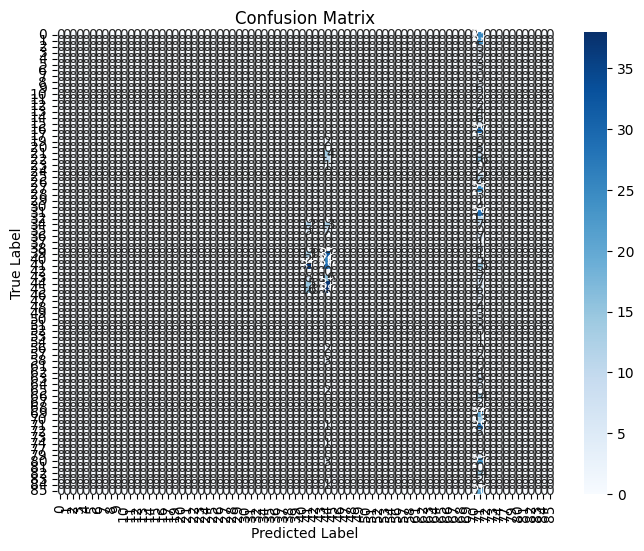


Feature Importances:
Ratings    1.0
Price      0.0
dtype: float64


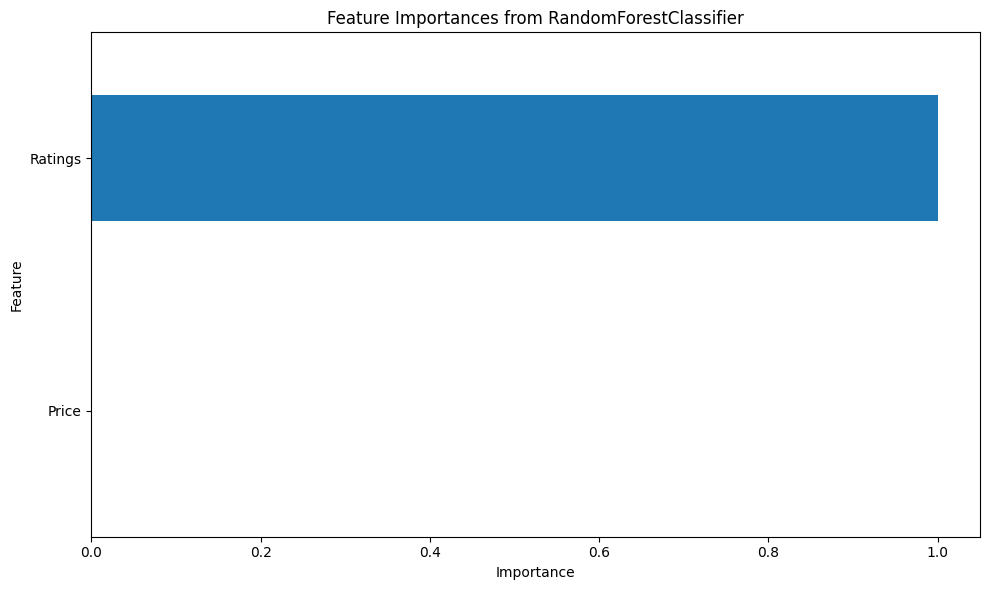


--- Model Evaluation Complete ---


In [30]:
# prompt: use some metrices to check whether the model is performing

import pandas as pd
import matplotlib.pyplot as plt
# --- Model Evaluation ---
print("\n--- Model Evaluation ---")

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
# Provides precision, recall, f1-score, and support for each class
# Decode predicted and actual values for report if LabelEncoder was used
if le is not None:
    try:
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        print("\nClassification Report:")
        # Use zero_division=0 to prevent warnings if a class has no predicted samples
        # Specify labels to ensure all classes (from the filtered set) are shown in the report
        report_labels = le.classes_
        print(classification_report(y_test_decoded, y_pred_decoded, labels=report_labels, zero_division=0))
    except Exception as e:
        print(f"Could not generate classification report on decoded labels: {e}")
        print("Showing report on encoded labels instead.")
        print("\nClassification Report (on encoded labels):")
        print(classification_report(y_test, y_pred, zero_division=0))
else:
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
# Visualizes the performance of the model
# Decode predicted and actual values for confusion matrix if LabelEncoder was used
if le is not None:
    try:
        y_test_decoded = le.inverse_transform(y_test)
        y_pred_decoded = le.inverse_transform(y_pred)
        print("\nConfusion Matrix:")
        # Specify labels to ensure the matrix shape includes all classes from the filtered set
        cm_labels = le.classes_
        print(confusion_matrix(y_test_decoded, y_pred_decoded, labels=cm_labels))

        # Optional: Plot the confusion matrix for better visualization
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test_decoded, y_pred_decoded, labels=cm_labels),
                    annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    except Exception as e:
        print(f"Could not generate confusion matrix on decoded labels: {e}")
        print("Showing matrix on encoded labels instead.")
        print("\nConfusion Matrix (on encoded labels):")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        # Optional: Plot the confusion matrix on encoded labels
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix (Encoded Labels)')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
else:
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # Optional: Plot the confusion matrix on numerical labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Numerical Labels)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Other relevant metrics for classification (depending on the problem):
# - Precision, Recall, F1-Score (already in classification report)
# - AUC-ROC (for binary or multi-class classification)
# - Log Loss (Cross-Entropy)
# - Cohen's Kappa

# Example: Calculate AUC-ROC for binary classification (assuming binary problem and predicted probabilities are available)
# If it's a multi-class problem, AUC-ROC can be calculated using different averaging strategies (e.g., 'ovo', 'ovr', 'weighted')
# from sklearn.metrics import roc_curve, auc, roc_auc_score
#
# if len(target_classes) == 2: # Check if it's a binary classification problem
#     print("\n--- Binary Classification Metrics ---")
#     try:
#         # Get predicted probabilities for the positive class
#         y_prob = rf_model.predict_proba(X_test)[:, 1]
#         # Calculate AUC
#         auc_score = roc_auc_score(y_test, y_prob)
#         print(f"AUC-ROC: {auc_score:.4f}")
#
#         # Optional: Plot ROC curve
#         fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#         plt.figure(figsize=(8, 6))
#         plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
#         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.legend(loc="lower right")
#         plt.show()
#
#     except Exception as e:
#          print(f"Could not calculate or plot AUC-ROC: {e}")
# else:
#     print("\nAUC-ROC is typically calculated for binary classification.")
#     # For multi-class AUC-ROC, use roc_auc_score with multi_class parameter
#     # Example:
#     # try:
#     #    y_prob_multiclass = rf_model.predict_proba(X_test)
#     #    auc_score_multiclass = roc_auc_score(y_test, y_prob_multiclass, multi_class='ovr') # or 'ovo', 'weighted'
#     #    print(f"Multi-class AUC (OvR): {auc_score_multiclass:.4f}")
#     # except Exception as e:
#     #    print(f"Could not calculate multi-class AUC: {e}")


# --- Feature Importances ---
print("\nFeature Importances:")
if not X.empty:
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print(importances.sort_values(ascending=False))

    # Optional: Plot feature importances
    plt.figure(figsize=(10, 6))
    importances.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importances from RandomForestClassifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot compute or plot feature importances as feature matrix is empty.")

print("\n--- Model Evaluation Complete ---")



--- Model Performance Summary ---

Evaluating RandomForestClassifier Performance:
Overall Accuracy: 0.1206

Classification Report (per class metrics):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00    

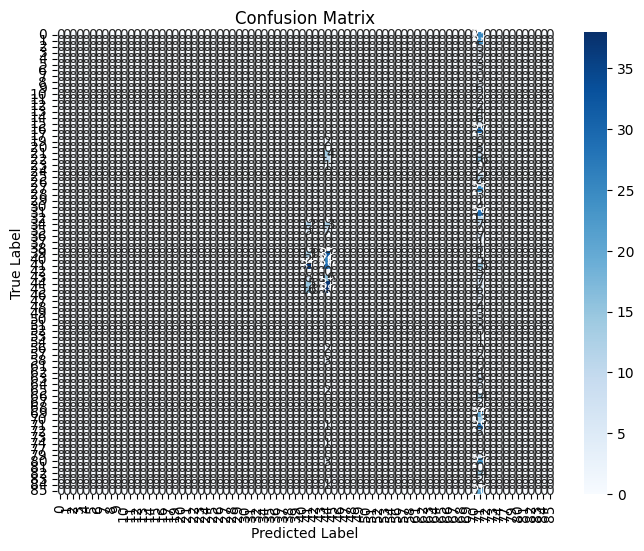


--- End of Model Performance Summary ---


In [31]:
# prompt: generate me an clear and simple metrices to whether the model is performing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Clear and Simple Performance Metrics ---
print("\n--- Model Performance Summary ---")

# For Classification Models (like the RandomForestClassifier example):
if 'rf_model' in locals():
  print("\nEvaluating RandomForestClassifier Performance:")
  # Basic Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Overall Accuracy: {accuracy:.4f}")

  # Classification Report: Provides per-class metrics (Precision, Recall, F1-Score)
  # Decode labels if LabelEncoder was used for interpretability
  if 'le' in locals() and le is not None:
      try:
          y_test_decoded = le.inverse_transform(y_test)
          y_pred_decoded = le.inverse_transform(y_pred)
          print("\nClassification Report (per class metrics):")
          # Use zero_division=0 to handle cases where a class has no true samples or no predicted samples
          report_labels = le.classes_
          print(classification_report(y_test_decoded, y_pred_decoded, labels=report_labels, zero_division=0))
      except Exception as e:
          print(f"Could not generate decoded classification report: {e}. Showing encoded report instead.")
          print("\nClassification Report (encoded labels):")
          print(classification_report(y_test, y_pred, zero_division=0))
  else:
      print("\nClassification Report (numerical labels):")
      print(classification_report(y_test, y_pred, zero_division=0))


  # Confusion Matrix: Visualizes correct vs. incorrect predictions for each class
  print("\nConfusion Matrix (True vs. Predicted):")
  if 'le' in locals() and le is not None:
      try:
           cm_labels = le.classes_
           cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=cm_labels)
           print(cm)
           # Optional: Plot the confusion matrix
           plt.figure(figsize=(8, 6))
           sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
           plt.title('Confusion Matrix')
           plt.xlabel('Predicted Label')
           plt.ylabel('True Label')
           plt.show()
      except Exception as e:
           print(f"Could not generate decoded confusion matrix: {e}. Showing encoded matrix instead.")
           cm = confusion_matrix(y_test, y_pred)
           print(cm)
           # Optional: Plot the confusion matrix on encoded labels
           plt.figure(figsize=(8, 6))
           sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
           plt.title('Confusion Matrix (Encoded Labels)')
           plt.xlabel('Predicted Label')
           plt.ylabel('True Label')
           plt.show()

  else:
      cm = confusion_matrix(y_test, y_pred)
      print(cm)
      # Optional: Plot the confusion matrix on numerical labels
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title('Confusion Matrix (Numerical Labels)')
      plt.xlabel('Predicted Label')
      plt.ylabel('True Label')
      plt.show()

  # If binary classification, consider AUC-ROC
  # Requires predicted probabilities: rf_model.predict_proba(X_test)
  # Check if it's a binary problem and if predict_proba is available
  if hasattr(rf_model, 'predict_proba') and len(np.unique(y_test)) == 2:
      try:
          y_prob = rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class
          auc = roc_auc_score(y_test, y_prob)
          print(f"\nAUC-ROC Score (for binary classification): {auc:.4f}")
      except Exception as e:
          print(f"Could not calculate AUC-ROC: {e}")


# For Regression Models (e.g., if you trained a regression model on the Inventory Optimization data)
# Example (assuming you had a regression model 'reg_model' predicting 'Demand'):
# if 'reg_model' in locals():
#    print("\nEvaluating Regression Model Performance:")
#    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#    y_reg_pred = reg_model.predict(X_reg_test) # Assuming X_reg_test and y_reg_test exist
#    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
#    mae = mean_absolute_error(y_reg_test, y_reg_pred)
#    r2 = r2_score(y_reg_test, y_reg_pred)
#    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#    print(f"Mean Absolute Error (MAE): {mae:.4f}")
#    print(f"R-squared (R2): {r2:.4f}")
#    # Optional: Plot actual vs predicted
#    plt.figure(figsize=(8, 6))
#    plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
#    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=2)
#    plt.xlabel("Actual")
#    plt.ylabel("Predicted")
#    plt.title("Actual vs. Predicted Values (Regression)")
#    plt.show()


# For Time Series Forecasting Models (like the SARIMAX example):
if 'results' in locals(): # Assuming 'results' is the fitted SARIMAX result object
    print("\nEvaluating SARIMAX Model Performance:")
    # The SARIMAX summary provides key metrics like AIC, BIC, Log Likelihood,
    # and information about the estimated coefficients and their standard errors.
    # You can print the summary again or extract specific metrics.
    print("SARIMAX Model Summary (key metrics):")
    print(results.summary())

    # For evaluating forecasts against a test set (if forecasting was performed)
    if 'test_data' in locals() and 'predicted_mean' in locals() and len(test_data) > 0:
        from sklearn.metrics import mean_squared_error, mean_absolute_error

        # Ensure test_data and predicted_mean align by index
        actual_test_sales = test_data['Sales']
        predicted_forecast = predicted_mean.reindex(actual_test_sales.index) # Align indices

        # Drop any NaNs that might occur from reindexing mismatches if needed
        combined = pd.DataFrame({'Actual': actual_test_sales, 'Predicted': predicted_forecast}).dropna()
        actual_aligned = combined['Actual']
        predicted_aligned = combined['Predicted']


        if len(combined) > 0:
             rmse_forecast = mean_squared_error(actual_aligned, predicted_aligned, squared=False)
             mae_forecast = mean_absolute_error(actual_aligned, predicted_aligned)
             print(f"\nForecast Evaluation on Test Set (first {len(predicted_mean)} steps):")
             print(f"Root Mean Squared Error (RMSE): {rmse_forecast:.4f}")
             print(f"Mean Absolute Error (MAE): {mae_forecast:.4f}")

             # Optional: Plot actual vs forecast on the test set (already included in a previous cell, but useful here)
             # This visual comparison is often the clearest metric for time series forecasts.
             # plt.figure(figsize=(12, 6))
             # plt.plot(train_data['Sales'], label='Training Data')
             # plt.plot(actual_aligned.index, actual_aligned, label='Actual Test Data', color='orange')
             # plt.plot(predicted_aligned.index, predicted_aligned, label='SARIMAX Forecast', color='green')
             # # Include confidence intervals if available (from forecast object)
             # if 'confidence_intervals' in locals():
             #      ci_aligned = confidence_intervals.reindex(predicted_aligned.index).dropna()
             #      plt.fill_between(ci_aligned.index,
             #                       ci_aligned.iloc[:, 0],
             #                       ci_aligned.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')
             # plt.title('SARIMAX Forecast vs Actual (Test Set)')
             # plt.xlabel('Date')
             # plt.ylabel('Sales')
             # plt.legend()
             # plt.show()
        else:
            print("\nNo overlapping data points between test set and forecast for evaluation.")
    else:
        print("\nTest data or forecast not available for evaluating SARIMAX predictions.")


print("\n--- End of Model Performance Summary ---")



In [32]:
# prompt: i need a minimal perdicted table

import pandas as pd
if 'rf_model' in locals() and 'X_test' in locals():
  print("\n--- Minimal Predicted Table ---")
  # Get predictions for the test set
  y_pred = rf_model.predict(X_test)

  # Create a DataFrame with actual and predicted values
  predicted_table = pd.DataFrame({
      'Actual': y_test,
      'Predicted': y_pred
  })

  # Optionally, decode the labels if LabelEncoder was used
  if 'le' in locals() and le is not None:
    try:
      predicted_table['Actual_Decoded'] = le.inverse_transform(predicted_table['Actual'])
      predicted_table['Predicted_Decoded'] = le.inverse_transform(predicted_table['Predicted'])
      # Display decoded values
      print(predicted_table[['Actual_Decoded', 'Predicted_Decoded']].head())
    except Exception as e:
      print(f"Could not decode labels for the predicted table: {e}")
      # Display encoded values if decoding fails
      print(predicted_table[['Actual', 'Predicted']].head())
  else:
    # Display encoded values if no LabelEncoder was used
    print(predicted_table[['Actual', 'Predicted']].head())

else:
  print("\nRandomForestClassifier model ('rf_model') or test data ('X_test') not available. Cannot generate predicted table.")




--- Minimal Predicted Table ---
   Actual_Decoded  Predicted_Decoded
0              71                 71
1              45                 44
2              40                 44
3              79                 71
4              44                 44


In [33]:
# prompt: visualize the prediction

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if 'rf_model' in locals() and 'X_test' in locals():
  print("\n--- Visualizing Predictions (Scatter Plot of Actual vs Predicted) ---")

  # Check if it's a classification task (y_test contains integer labels)
  if np.issubdtype(y_test.dtype, np.integer):
      print("Scatter plot of actual vs predicted is typically for regression.")
      print("For classification, consider visualizing the confusion matrix or a sample of predictions.")

      # Optional: Display a sample of predictions and actual values
      predicted_table = pd.DataFrame({
          'Actual': y_test,
          'Predicted': y_pred
      }).head(20) # Display first 20

      if 'le' in locals() and le is not None:
          try:
              predicted_table['Actual_Decoded'] = le.inverse_transform(predicted_table['Actual'])
              predicted_table['Predicted_Decoded'] = le.inverse_transform(predicted_table['Predicted'])
              print("\nSample of Actual vs Predicted Labels (first 20):")
              print(predicted_table[['Actual_Decoded', 'Predicted_Decoded']])
          except Exception as e:
              print(f"Could not decode sample labels: {e}")
              print("\nSample of Actual vs Predicted Labels (encoded, first 20):")
              print(predicted_table[['Actual', 'Predicted']])
      else:
          print("\nSample of Actual vs Predicted Labels (numerical, first 20):")
          print(predicted_table[['Actual', 'Predicted']])


  # If you trained a regression model and have y_reg_test and y_reg_pred,
  # you could visualize actual vs predicted like this:
  # if 'y_reg_test' in locals() and 'y_reg_pred' in locals():
  #   print("\n--- Visualizing Predictions (Actual vs Predicted Regression) ---")
  #   plt.figure(figsize=(8, 6))
  #   plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
  #   # Add a line for perfect prediction (y=x)
  #   min_val = min(y_reg_test.min(), y_reg_pred.min())
  #   max_val = max(y_reg_test.max(), y_reg_pred.max())
  #   plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
  #   plt.xlabel("Actual Values")
  #   plt.ylabel("Predicted Values")
  #   plt.title("Actual vs. Predicted Values")
  #   plt.grid(True)
  #   plt.show()


  # If you have a Time Series forecast (like SARIMAX)
  # A plot of the actual vs. predicted time series is the most common visualization.
  if 'test_data' in locals() and 'predicted_mean' in locals() and len(test_data) > 0:
      print("\n--- Visualizing Time Series Forecast vs Actual ---")
      # Ensure data is aligned and non-empty for plotting
      combined = pd.DataFrame({'Actual': test_data['Sales'], 'Predicted': predicted_mean}).dropna()

      if not combined.empty:
          plt.figure(figsize=(12, 6))
          # Plot training data if available
          if 'train_data' in locals():
              plt.plot(train_data.index, train_data['Sales'], label='Training Data')
          # Plot actual test data
          plt.plot(combined.index, combined['Actual'], label='Actual Test Data', color='orange')
          # Plot forecast
          plt.plot(combined.index, combined['Predicted'], label='Forecast', color='green', linestyle='--')

          # Include confidence intervals if available and aligned
          if 'confidence_intervals' in locals():
              ci_aligned = confidence_intervals.reindex(combined.index)
              if not ci_aligned.empty:
                 plt.fill_between(ci_aligned.index,
                                  ci_aligned.iloc[:, 0],
                                  ci_aligned.iloc[:, 1], color='k', alpha=.1, label='Confidence Interval')

          plt.title('Time Series Forecast vs Actual')
          plt.xlabel('Date')
          plt.ylabel('Value') # Or 'Sales' or relevant label
          plt.legend()
          plt.show()
      else:
          print("Not enough overlapping data between test set and forecast to visualize.")


else:
  print("\nModel or test data not available for visualization.")



--- Visualizing Predictions (Scatter Plot of Actual vs Predicted) ---
Scatter plot of actual vs predicted is typically for regression.
For classification, consider visualizing the confusion matrix or a sample of predictions.

Sample of Actual vs Predicted Labels (first 20):
    Actual_Decoded  Predicted_Decoded
0               71                 71
1               45                 44
2               40                 44
3               79                 71
4               44                 44
5               34                 41
6               14                 71
7               41                 41
8               32                 71
9               44                 41
10              41                 41
11              41                 41
12              44                 41
13              39                 71
14              40                 44
15              22                 71
16              41                 71
17              69                 71
18

In [44]:
# prompt: save the model

import joblib

# Save the trained RandomForestClassifier model
if 'rf_model' in locals() and rf_model is not None:
  model_filename = 'random_forest_model.joblib'
  joblib.dump(rf_model, model_filename)
  print(f"\nRandomForestClassifier model saved successfully as '{model_filename}'")
else:
  print("\nRandomForestClassifier model ('rf_model') not found or is not trained. Cannot save.")

# Save the fitted SARIMAX model results (if applicable)
if 'results' in locals() and results is not None:
    sarimax_filename = 'sarimax_results.joblib'
    joblib.dump(results, sarimax_filename)
    print(f"SARIMAX model results saved successfully as '{sarimax_filename}'")
else:
    print("SARIMAX model results ('results') not found or is not fitted. Cannot save.")

# If you used a LabelEncoder and need to save it to decode future predictions
if 'le' in locals() and le is not None:
    encoder_filename = 'label_encoder.joblib'
    joblib.dump(le, encoder_filename)
    print(f"LabelEncoder saved successfully as '{encoder_filename}'")
else:
    print("LabelEncoder ('le') not found or not used. Cannot save.")


RandomForestClassifier model saved successfully as 'random_forest_model.joblib'
SARIMAX model results ('results') not found or is not fitted. Cannot save.
LabelEncoder saved successfully as 'label_encoder.joblib'
